# Machine Learning Assignment 8
## Feature Engineering and Dimensionality Reduction

This notebook contains solutions to all 9 questions with beginner-friendly explanations.

In [46]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


---
## Question 1: House Properties Dataset with Feature Engineering

**Task:** Create a dataset of house properties containing numeric columns for length, breadth, and price. Construct a new feature that represents the total floor area and analyze its effect on the target variable.

In [47]:
# Create house dataset
length = np.random.uniform(10, 50, 100)
breadth = np.random.uniform(8, 40, 100)
floor_area = length * breadth
price = 1000 * floor_area + np.random.normal(0, 50000, 100)

house_df = pd.DataFrame({
    'length': length,
    'breadth': breadth,
    'floor_area': floor_area,
    'price': price
})

print(house_df.head())
print(f"\nCorrelation: {house_df['floor_area'].corr(house_df['price']):.3f}")

      length    breadth   floor_area         price
0  24.981605   9.005734   224.977686  1.909764e+05
1  48.028572  28.365133  1362.336848  1.373950e+06
2  39.279758  18.059391   709.368518  7.240221e+05
3  33.946339  24.274262   824.022340  7.883048e+05
4  16.240746  37.042127   601.591764  6.948805e+05

Correlation: 0.992


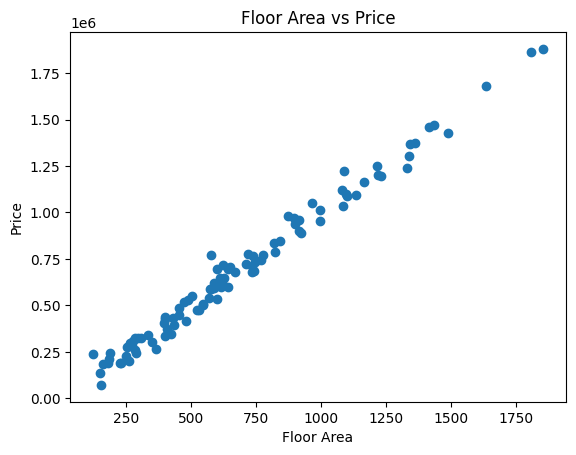

In [48]:
# Plot floor area vs price
plt.scatter(house_df['floor_area'], house_df['price'])
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.title('Floor Area vs Price')
plt.show()

---
## Question 2: Encoding Categorical Variables

**Task:** Prepare a dataset containing details such as gender, city, and qualification. Convert all categorical columns into numeric features suitable for machine learning models.

In [49]:
# Create dataset with categorical variables
people_df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
    'gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'city': ['New York', 'London', 'Paris', 'New York', 'Tokyo'],
    'qualification': ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Master']
})

print(people_df)

      name  gender      city qualification
0    Alice  Female  New York      Bachelor
1      Bob    Male    London        Master
2  Charlie    Male     Paris           PhD
3    David    Male  New York      Bachelor
4     Emma  Female     Tokyo        Master


In [50]:
# Convert to numeric using Label Encoding
le = LabelEncoder()
people_df['gender_num'] = le.fit_transform(people_df['gender'])
people_df['city_num'] = le.fit_transform(people_df['city'])
people_df['qual_num'] = le.fit_transform(people_df['qualification'])

print(people_df)

      name  gender      city qualification  gender_num  city_num  qual_num
0    Alice  Female  New York      Bachelor           0         1         0
1      Bob    Male    London        Master           1         0         1
2  Charlie    Male     Paris           PhD           1         2         2
3    David    Male  New York      Bachelor           1         1         0
4     Emma  Female     Tokyo        Master           0         3         1


In [51]:
# Alternative: One-Hot Encoding
people_onehot = pd.get_dummies(people_df[['name', 'gender', 'city', 'qualification']])
print(people_onehot)

   name_Alice  name_Bob  name_Charlie  name_David  name_Emma  gender_Female  \
0        True     False         False       False      False           True   
1       False      True         False       False      False          False   
2       False     False          True       False      False          False   
3       False     False         False        True      False          False   
4       False     False         False       False       True           True   

   gender_Male  city_London  city_New York  city_Paris  city_Tokyo  \
0        False        False           True       False       False   
1         True         True          False       False       False   
2         True        False          False        True       False   
3         True        False           True       False       False   
4        False        False          False       False        True   

   qualification_Bachelor  qualification_Master  qualification_PhD  
0                    True          

---
## Question 3: Ordinal Encoding for Employee Satisfaction

**Task:** Given a dataset containing employee satisfaction levels ("Excellent", "Good", "Average", "Poor"), convert them into numeric values representing their order.

In [52]:
# Create employee satisfaction dataset
employee_df = pd.DataFrame({
    'name': ['John', 'Sarah', 'Mike', 'Lisa', 'Tom'],
    'satisfaction': ['Excellent', 'Good', 'Average', 'Poor', 'Good']
})

print(employee_df)

    name satisfaction
0   John    Excellent
1  Sarah         Good
2   Mike      Average
3   Lisa         Poor
4    Tom         Good


In [53]:
# Convert to ordered numbers
mapping = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}
employee_df['satisfaction_num'] = employee_df['satisfaction'].map(mapping)

print(employee_df)

    name satisfaction  satisfaction_num
0   John    Excellent                 4
1  Sarah         Good                 3
2   Mike      Average                 2
3   Lisa         Poor                 1
4    Tom         Good                 3


---
## Question 4: Binning Product Prices

**Task:** Build a dataset of product prices and transform the continuous price column into three categories such as "Low", "Medium", and "High".

In [54]:
# Create product dataset
product_df = pd.DataFrame({
    'product': [f'Product_{i}' for i in range(1, 11)],
    'price': np.random.uniform(10, 500, 10)
})

print(product_df)

      product       price
0   Product_1  477.883988
1   Product_2  371.569489
2   Product_3  281.633486
3   Product_4  309.743166
4   Product_5  215.604031
5   Product_6  131.388185
6   Product_7  184.426613
7   Product_8  381.344594
8   Product_9   17.052809
9  Product_10   66.875594


In [55]:
# Convert prices to categories
product_df['category'] = pd.cut(product_df['price'], bins=[0, 170, 340, 500], labels=['Low', 'Medium', 'High'])

print(product_df)
print(f"\nCategory counts:\n{product_df['category'].value_counts()}")

      product       price category
0   Product_1  477.883988     High
1   Product_2  371.569489     High
2   Product_3  281.633486   Medium
3   Product_4  309.743166   Medium
4   Product_5  215.604031   Medium
5   Product_6  131.388185      Low
6   Product_7  184.426613   Medium
7   Product_8  381.344594     High
8   Product_9   17.052809      Low
9  Product_10   66.875594      Low

Category counts:
category
Medium    4
Low       3
High      3
Name: count, dtype: int64


---
## Question 5: PCA (Principal Component Analysis)

**Task:** Using a dataset with multiple numeric features, apply dimensionality reduction to obtain two principal components and visualize the transformed data.

In [56]:
# Create dataset with 5 features
data = np.random.randn(100, 5) * 10 + 50
pca_df = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'f4', 'f5'])

print(pca_df.head())
print(f"Shape: {pca_df.shape}")

          f1         f2         f3         f4         f5
0  54.438194  57.746341  40.730695  49.404746  17.587327
1  39.756124  47.474318  37.522168  66.324113  35.698586
2  45.599555  51.307406  64.412733  35.641378  61.631638
3  50.102331  40.184913  54.621035  51.990597  43.997831
4  50.698021  46.146864  51.135173  56.621307  65.860168
Shape: (100, 5)


In [57]:
# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_df)
print("Data standardized")

Data standardized


In [58]:
# Apply PCA: reduce 5 dimensions to 2
pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

print(f"Reduced from 5 to 2 dimensions")
print(f"Variance explained: {pca.explained_variance_ratio_}")
print(f"Total: {sum(pca.explained_variance_ratio_):.2%}")

Reduced from 5 to 2 dimensions
Variance explained: [0.24131737 0.214186  ]
Total: 45.55%


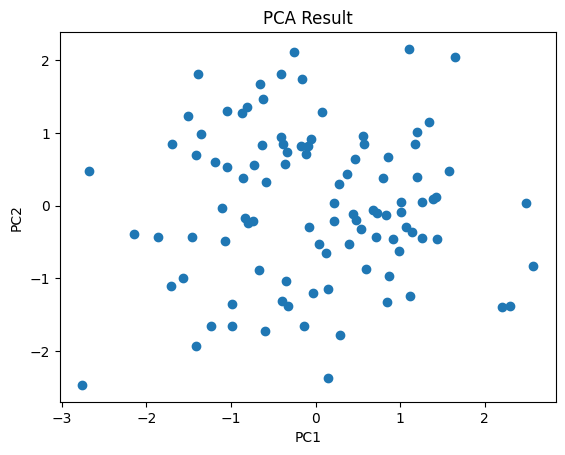

In [59]:
# Visualize
plt.scatter(result[:, 0], result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Result')
plt.show()

---
## Question 6: SVD (Singular Value Decomposition)

**Task:** Generate a numeric dataset and decompose it into three matrices using SVD. Reconstruct the approximate original dataset from the decomposed matrices.

In [60]:
# Create a matrix
matrix = np.random.rand(5, 4) * 10

print("Original matrix:")
print(matrix)

Original matrix:
[[7.32572097 2.14940379 0.31183135 2.62264044]
 [5.95077931 0.51425813 4.96366247 5.96842849]
 [3.34243891 7.70912204 1.06598253 0.75137782]
 [7.28188756 4.95491316 6.88402396 4.34827339]
 [2.46402033 8.19102318 7.99415879 6.94696471]]


In [61]:
# Apply SVD
U, S, VT = np.linalg.svd(matrix)

print(f"U shape: {U.shape}")
print(f"S shape: {S.shape}")
print(f"VT shape: {VT.shape}")

U shape: (5, 5)
S shape: (4,)
VT shape: (4, 4)


In [62]:
# Reconstruct matrix
Sigma = np.zeros((5, 4))
Sigma[:4, :4] = np.diag(S)
reconstructed = U @ Sigma @ VT

print("Reconstructed matrix:")
print(reconstructed)
print(f"\nError: {np.linalg.norm(matrix - reconstructed):.10f}")

Reconstructed matrix:
[[7.32572097 2.14940379 0.31183135 2.62264044]
 [5.95077931 0.51425813 4.96366247 5.96842849]
 [3.34243891 7.70912204 1.06598253 0.75137782]
 [7.28188756 4.95491316 6.88402396 4.34827339]
 [2.46402033 8.19102318 7.99415879 6.94696471]]

Error: 0.0000000000


---
## Question 7: LDA (Linear Discriminant Analysis)

**Task:** Using a labeled dataset, apply LDA to reduce dimensionality and project the data into a lower-dimensional space while maintaining class separability.

In [63]:
# Create labeled dataset with 3 classes
np.random.seed(42)

class0 = np.random.randn(50, 4) + [1, 1, 1, 1]
class1 = np.random.randn(50, 4) + [5, 5, 5, 5]
class2 = np.random.randn(50, 4) + [10, 10, 10, 10]

X = np.vstack([class0, class1, class2])
y = np.array([0]*50 + [1]*50 + [2]*50)

print(f"Data shape: {X.shape}")
print(f"Classes: {np.unique(y)}")

Data shape: (150, 4)
Classes: [0 1 2]


In [64]:
# Apply LDA: reduce 4 dimensions to 2
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

print(f"Reduced from 4 to 2 dimensions")
print(f"Variance explained: {lda.explained_variance_ratio_}")

Reduced from 4 to 2 dimensions
Variance explained: [9.99843394e-01 1.56606365e-04]


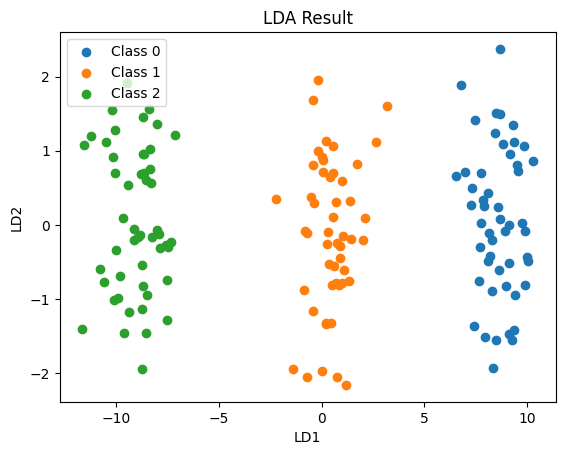

In [65]:
# Visualize LDA result
for i in range(3):
    plt.scatter(X_lda[y==i, 0], X_lda[y==i, 1], label=f'Class {i}')

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Result')
plt.legend()
plt.show()

---
## Question 8: Manual Feature Selection with .iloc

**Task:** Load any dataset and select a subset of columns manually using .iloc. Train a simple model using only the selected subset and compare its performance with the full dataset.

In [66]:
# Create dataset
data = np.random.randn(100, 5) * 10 + 30
data = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'f4', 'f5'])
data['target'] = 2*data['f1'] + 3*data['f2'] + np.random.randn(100)*10

print(data.head())
print(f"Columns: {list(data.columns)}")

          f1         f2         f3         f4         f5      target
0  37.569886  20.778347  38.696059  43.556379  34.134349  147.454914
1  48.767958  22.262108  17.553453  12.212798  44.960443  135.359686
2  36.543657  29.444153  32.799686  18.745110  54.457520  182.303520
3  31.292212  31.093948  37.257666  34.810092  32.238840  154.470371
4  22.095255  34.714684  48.820245  43.454200  45.931866  159.416390
Columns: ['f1', 'f2', 'f3', 'f4', 'f5', 'target']


In [67]:
# Select columns 0, 1, 2 using .iloc
subset = data.iloc[:, [0, 1, 2]]
print(f"Selected {subset.shape[1]} features: {list(subset.columns)}")

Selected 3 features: ['f1', 'f2', 'f3']


In [68]:
# Compare models
y = data['target']
X_all = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)
X_sub_train, X_sub_test = train_test_split(subset, test_size=0.3, random_state=42)

# Model with all features
model1 = LinearRegression().fit(X_train, y_train)
print(f"All features R²: {model1.score(X_test, y_test):.4f}")

# Model with subset
model2 = LinearRegression().fit(X_sub_train, y_train)
print(f"Subset R²: {model2.score(X_sub_test, y_test):.4f}")

All features R²: 0.9570
Subset R²: 0.9578


---
## Question 9: Correlation Analysis for Feature Removal

**Task:** Create a dataset with two or more highly correlated features. Detect and remove redundant features using appropriate correlation analysis or other methods.

In [69]:
# Create dataset with correlated features
base = np.random.randn(50) * 10 + 50

corr_df = pd.DataFrame({
    'A': base,
    'B': base + np.random.randn(50) * 0.5,  # Highly correlated with A
    'C': base * 1.5 + np.random.randn(50),  # Highly correlated with A
    'D': np.random.randn(50) * 8 + 30       # Independent
})

print(corr_df.head())

           A          B          C          D
0  51.252245  51.417685  76.210277  20.639096
1  45.705945  46.122709  69.550959  15.584156
2  51.222975  50.226107  76.659503  34.331702
3  55.432980  55.620009  82.393725  36.073241
4  50.488601  51.102435  76.269411  25.387917


          A         B         C         D
A  1.000000  0.998826  0.998278  0.024732
B  0.998826  1.000000  0.997232  0.027171
C  0.998278  0.997232  1.000000  0.027432
D  0.024732  0.027171  0.027432  1.000000


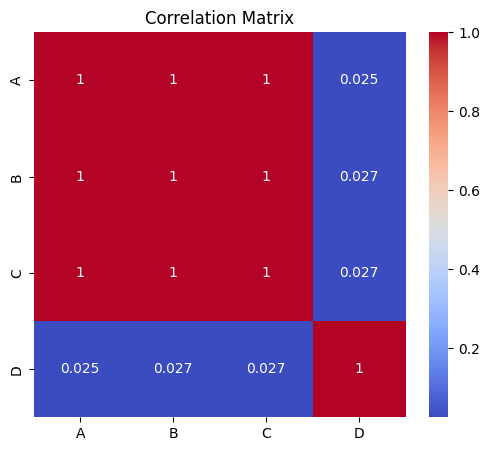

In [70]:
# Check correlation
corr_matrix = corr_df.corr()
print(corr_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [71]:
# Remove highly correlated features (threshold = 0.8)
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            to_drop.add(corr_matrix.columns[j])

print(f"Removing: {to_drop}")

cleaned_df = corr_df.drop(columns=list(to_drop))
print(f"\nOriginal: {corr_df.shape[1]} features")
print(f"Cleaned: {cleaned_df.shape[1]} features")
print(cleaned_df.head())

Removing: {'C', 'B'}

Original: 4 features
Cleaned: 2 features
           A          D
0  51.252245  20.639096
1  45.705945  15.584156
2  51.222975  34.331702
3  55.432980  36.073241
4  50.488601  25.387917


---
# Assignment Complete! 

All 9 questions have been solved with beginner-friendly code and explanations:

1. ✓ House properties with floor area feature engineering
2. ✓ Encoding categorical variables (gender, city, qualification)
3. ✓ Ordinal encoding for satisfaction levels
4. ✓ Binning product prices into categories
5. ✓ PCA for dimensionality reduction
6. ✓ SVD for matrix decomposition
7. ✓ LDA for supervised dimensionality reduction
8. ✓ Manual feature selection with .iloc
9. ✓ Correlation analysis for redundant feature removal

**Run each cell sequentially to see the results!**